In [1]:
import csv

# Data Processing
import numpy as np
from numpy import genfromtxt

# Plotting
from sklearn.metrics import roc_curve, auc
import matplotlib
import matplotlib.pyplot as plot
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator

## Settings

In [2]:
# Files containing the FPR and TPR for each classifier
knn_roc_path = r'C:\Users\alext\Desktop\School\2021 Spring\CS 271\Final Project\Classification\KNN ROC Data.csv'
lda_roc_path = r'C:\Users\alext\Desktop\School\2021 Spring\CS 271\Final Project\Classification\LDA ROC Data.csv'
pca_roc_path = r'C:\Users\alext\Desktop\School\2021 Spring\CS 271\Final Project\Classification\PCA ROC Data.csv'
rf_roc_path = r'C:\Users\alext\Desktop\School\2021 Spring\CS 271\Final Project\Classification\Random Forest ROC Data.csv'
svm_roc_path = r'C:\Users\alext\Desktop\School\2021 Spring\CS 271\Final Project\Classification\SVM ROC Data.csv'
stack_roc_path = r'C:\Users\alext\Desktop\School\2021 Spring\CS 271\Final Project\Classification\Stack Ensemble ROC Data.csv'

# Set the plot font
font = {'family' : 'DejaVu Sans',
        'size'   : 18}

matplotlib.rc('font', **font)

## Load the FPR and TPR for Each Classifier

In [3]:
def parse_roc_data(roc_data_path):
    roc_data = genfromtxt(roc_data_path, delimiter=',')
    fpr = roc_data[:,0]
    tpr = roc_data[:,1]
    roc_auc = auc(fpr, tpr)
    
    return (fpr, tpr, roc_auc)

## Plot the ROC Curve for a Single Classifier

In [4]:
def plot_roc(roc_data_path, name, color):
    roc_data = genfromtxt(roc_data_path, delimiter=',')
    fpr = roc_data[:,0]
    tpr = roc_data[:,1]
    roc_auc = auc(fpr, tpr)
    
    label = name + ' (AUC = %0.2f)' % roc_auc
    plot.plot(fpr, tpr, color=color, lw=2, label=label)

## Plot the ROC Curve of Each Classifier

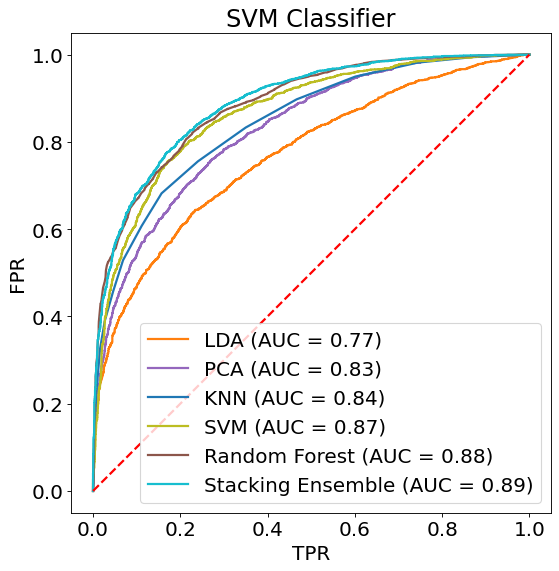

In [6]:
# Set the plot settings
fig = figure(figsize=(6, 6), dpi=80)
ax = fig.add_axes([0,0,1,1])
plot.title('SVM Classifier')
plot.xlabel('TPR')
plot.ylabel('FPR')

# The the ROC curve for each classifier
plot_roc(lda_roc_path, 'LDA', 'tab:orange')
plot_roc(pca_roc_path, 'PCA', 'tab:purple')
plot_roc(knn_roc_path, 'KNN', 'tab:blue')
plot_roc(svm_roc_path, 'SVM', 'tab:olive')
plot_roc(rf_roc_path, 'Random Forest', 'tab:brown')
plot_roc(stack_roc_path, 'Stacking Ensemble', 'tab:cyan')

# Draw the middle line
plot.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

plot.legend(loc='lower right')
plot.show()